## Escuela Colombiana de Ingeniería Julio Garavito

### Programming for Data Analysis

### Author

Juan Pablo Sánchez Bermúdez

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

# Breast Cancer Coimbra Data Set

### 1. Selecting Data Set
I chose the Breast Cancer Coimbra Data Set from the UC Irvine Machine Learning Repository [Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra).

### 2. Loading data
Now that I have the data set, let's proceed to download it and load it into this notebook in a DataFrame type variable:

In [2]:
# Data set url
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv'

# Read data from CSV file
dataFrame = pd.read_csv(path)
dataFrame.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


### 3. Data Transformation and Discretization

The following function takes the data frame created above and normalize its columns according to the argument the user choose between ```standar``` or ```scale```.

Taken from [Chapter 3 Data Preprocessing.](http://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf)

In [3]:
def normalization(df, argument):
    size = df.shape
    rows = size[0]
    columns = size[1]
    c = dataFrame.columns
    df2 = copy.copy(df)
    if argument.lower() == "standar":
        for row in range(rows):
            for column in range(columns):
                df2.iloc[row, column] = (df2.iloc[row, column] - df2[c[column]].mean()) / df2[c[column]].std()
    elif argument.lower() == "scale":
        for row in range(rows):
            for column in range(columns):
                df2.iloc[row, column] = (df2.iloc[row, column] - df2[c[column]].min()) / (df2[c[column]].max() - df2[c[column]].min())
    else:
        print("You did not type neither standar nor scale!")
    return df2
        

**Standar** subtracts the value and the mean, and divide by the standard deviation.

<p style="text-align: center;"> $v_i' = \frac{v_i - \mu}{\sigma}$ </p>

In [4]:
print(normalization(dataFrame, "standar"))

           Age       BMI    Glucose   Insulin      HOMA     Leptin  \
0    -0.577289 -0.813147  -1.233869 -0.725591 -0.611629  -0.928307   
1     1.539437 -1.180787  -0.214024 -0.680325 -0.542260  -0.917255   
2     1.471125 -0.652614  -0.208446 -0.538554 -0.455379  -0.438953   
3     0.691183 -0.834273  -0.680264 -0.657689 -0.559195  -0.840183   
4     1.656880 -0.789792  -0.101971 -0.620846 -0.502871  -0.993212   
..         ...       ...        ...       ...       ...        ...   
111   3.030977  4.433770   4.132193  0.946967  0.153013   4.545933   
112   4.494358  4.905131   4.934092  1.451705  0.401973   0.987930   
113   5.250242  6.709351   5.436542  1.973134  0.578646   5.754984   
114   6.757982  6.781067   5.353510  0.794130  0.039674   2.681720   
115  10.539759  9.266034  10.619393  8.020997  4.262066  10.551645   

     Adiponectin  Resistin      MCP.1  Classification  
0      -0.069918 -0.543161  -0.339777       -1.104608  
1      -0.675534 -0.850045  -0.178248       -0.

**Scale** subtracts the value and minimum value of the column, and divide by the substraction of maximum value of the column and minimum value of the column.

<p style="text-align: center;"> $v_i' = \frac{v_i - min_A}{max_A - min_A}$ </p>

In [5]:
print(normalization(dataFrame, "scale"))

          Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0    0.369231  0.253850  0.070922  0.004908  0.000000  0.052299     0.221152   
1    0.932303  0.533247  0.457520  0.053205  0.028219  0.097437     0.137713   
2    0.921021  0.596761  0.452543  0.076864  0.040305  0.198243     0.588205   
3    0.763062  0.550913  0.382867  0.055104  0.024460  0.108951     0.185526   
4    0.966152  0.544222  0.457520  0.060629  0.032151  0.073670     0.123516   
..        ...       ...       ...       ...       ...       ...          ...   
111  0.521717  0.836458  0.666495  0.167047  0.111502  0.605465     0.357618   
112  0.720030  0.836144  0.724496  0.227333  0.164872  0.137453     0.634154   
113  0.755026  1.000000  0.702746  0.287619  0.202291  0.680826     0.667386   
114  0.836684  0.940950  0.593994  0.141426  0.084161  0.276095     1.000000   
115  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000     1.000000   

     Resistin     MCP.1  Classification

### 4. Cleaning and manipulating data

#### Exploring the Breast Cancer Coimbra data set

+ Complete records

In [6]:
def completeRecords(df):
    size = df.shape
    rows = size[0]
    columns = size[1]
    records = 0
    status = True
    for row in range(rows):
        for column in range(columns):
            if not (str(df.iloc[row, column]).isdigit()) and not ('.' in str(df.iloc[row, column])):
                status = False
                break
        if status:
            records += 1
        status = True
    return records

In [7]:
print("Number of complete records in Breast Cancer Coimbra data set:", completeRecords(dataFrame))

Number of complete records in Breast Cancer Coimbra data set: 116


+ Missing data

In [8]:
dataFrame.shape

(116, 10)

Given that there are 116 complete records, it means that there is not missing data in the data set.

+ Data types of the dataset

In [9]:
dataFrame.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

+ Statistical description of some metrics for the dataset variables

In [10]:
dataFrame.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [11]:
# Number of patients older that 25 who have breast cancer
dataFrame[dataFrame.Age > 25].shape[0]

114

In [12]:
# Mean
dataFrame.mean()

Age                57.301724
BMI                27.582111
Glucose            97.793103
Insulin            10.012086
HOMA                2.694988
Leptin             26.615080
Adiponectin        10.180874
Resistin           14.725966
MCP.1             534.647000
Classification      1.551724
dtype: float64

In [13]:
# Standard Deviation
dataFrame.std()

Age                16.112766
BMI                 5.020136
Glucose            22.525162
Insulin            10.067768
HOMA                3.642043
Leptin             19.183294
Adiponectin         6.843341
Resistin           12.390646
MCP.1             345.912663
Classification      0.499475
dtype: float64

### 5. Visualizing data

+ Plot a histogram of two variables from the data set.

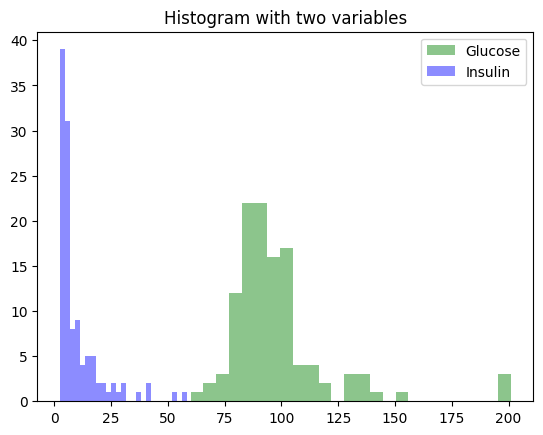

In [14]:
# Plotting two histograms on the same axis
plt.hist(dataFrame['Glucose'], bins = 25, alpha = 0.45, color = 'green')
plt.hist(dataFrame['Insulin'], bins = 25, alpha = 0.45, color = 'Blue')

# Title
plt.title("Histogram with two variables")

# Legend
plt.legend(['Glucose', 'Insulin'])

plt.show()

+ Scatter plots displaying two variables of the dataset.

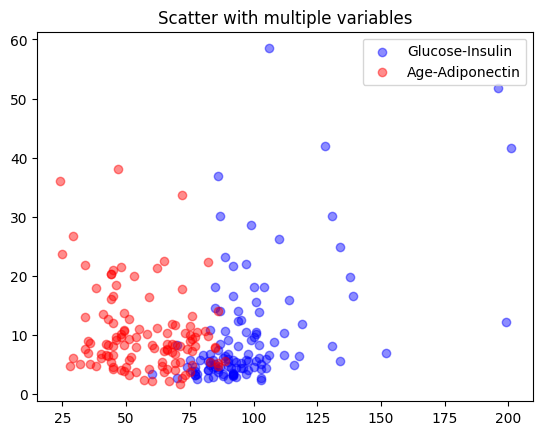

In [15]:
# Plotting two scatters on the same axis
plt.scatter(dataFrame.Glucose, dataFrame.Insulin, alpha = 0.45, color = "Blue")
plt.scatter(dataFrame.Age, dataFrame.Adiponectin, alpha = 0.45, color = "Red")

# Title
plt.title("Scatter with multiple variables")

# Legend
plt.legend(['Glucose-Insulin', 'Age-Adiponectin'])

plt.show()

+ Correlation plot between the data frame variables. What are the most correlated variables?

Given the correlation matrix below, the most correlated variables are ```Insulin``` and ```HOMA``` due to they are almost 1.

In [16]:
# Correlation matrix
correlation = dataFrame.corr()
correlation.style.background_gradient(axis=0)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000
